In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/DailyDelhiClimateTest.csv')

In [4]:
# If 'date' column is missing, create a fake date range
if 'date' not in df.columns:
    df['date'] = pd.date_range(start='2025-01-01', periods=len(df), freq='D')

In [5]:
# Step 3: Basic exploration
print("First 5 rows:")
print(df.head())

First 5 rows:
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [6]:
print("\nData Summary:")
print(df.info())

print("\nDescriptive Stats:")
print(df.describe())

print("\nColumn Names:")
print(df.columns)


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None

Descriptive Stats:
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524

In [7]:
# Step 4: Create a fake 'date' column if it's missing
if 'date' not in df.columns:
    df['date'] = pd.date_range(start='2025-01-01', periods=len(df), freq='D')

In [8]:
# Convert 'date' to datetime just in case
df['date'] = pd.to_datetime(df['date'])

In [9]:
# Step 5: Handle missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [10]:
# Step 6: Set 'date' as index for time series
df.set_index('date', inplace=True)

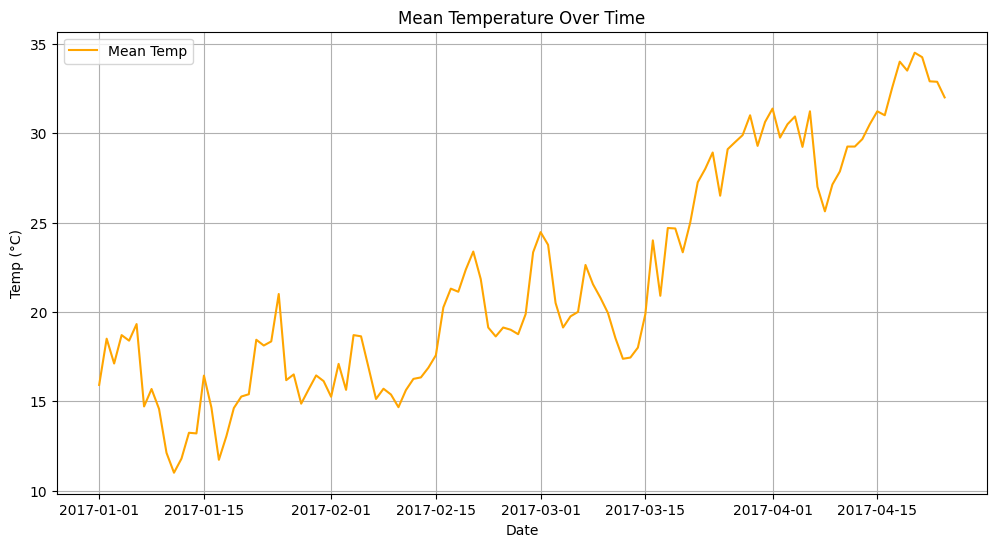

In [11]:
# Step 7: Plotting key columns
plt.figure(figsize=(12, 6))
plt.plot(df['meantemp'], label='Mean Temp', color='orange')
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temp (°C)')
plt.legend()
plt.grid(True)
plt.show()

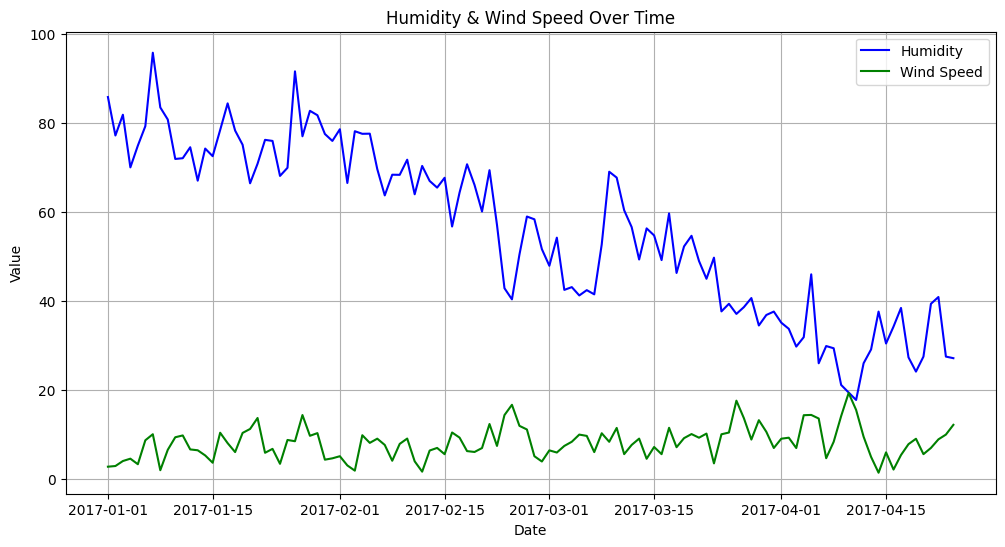

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['humidity'], label='Humidity', color='blue')
plt.plot(df['wind_speed'], label='Wind Speed', color='green')
plt.title('Humidity & Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Step 8: Outlier detection using IQR method
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [14]:
for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    outliers = find_outliers(col)
    print(f"\nOutliers in {col}: {len(outliers)} rows")


Outliers in meantemp: 0 rows

Outliers in humidity: 0 rows

Outliers in wind_speed: 2 rows

Outliers in meanpressure: 1 rows


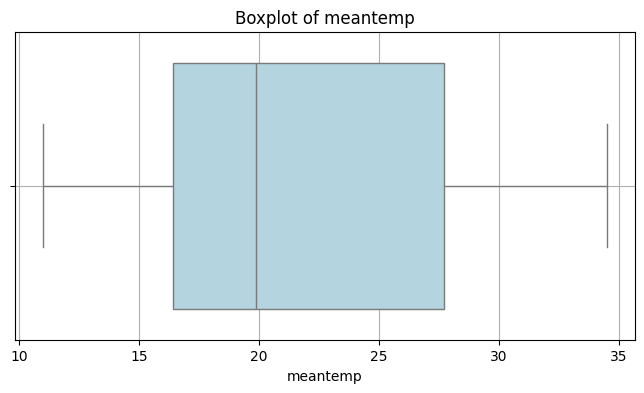

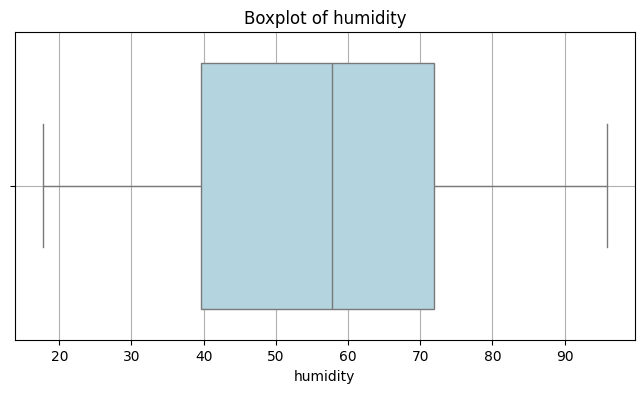

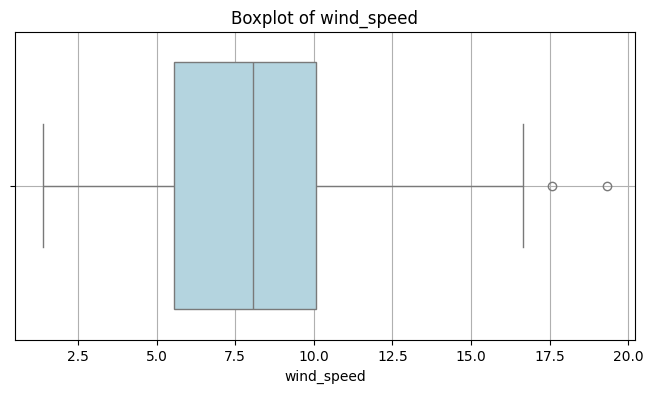

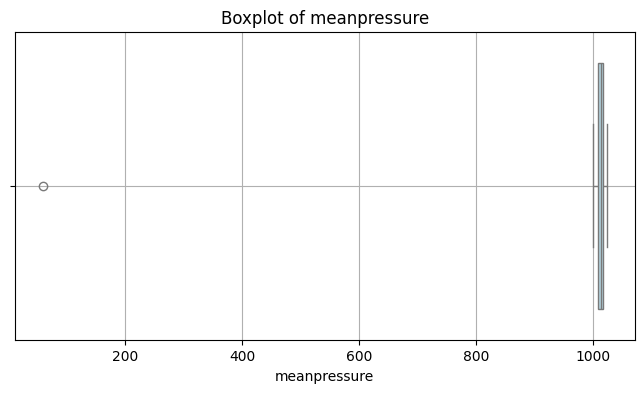

In [15]:
# Step 9: Boxplots to visualize outliers
for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

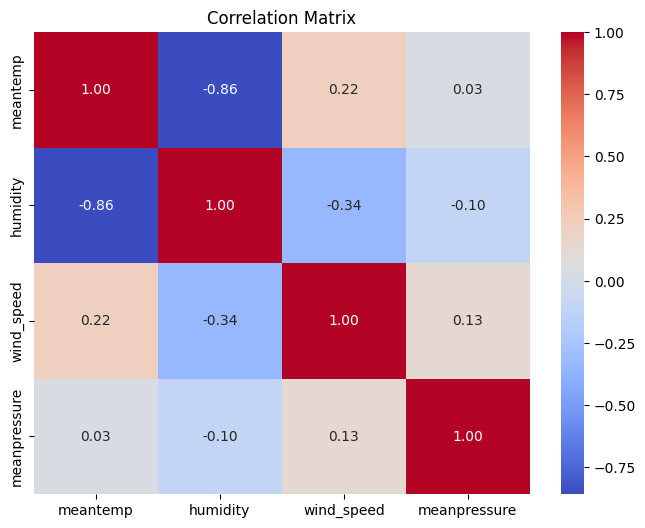

In [16]:
# Step 10: Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Step 11: Save cleaned data
df.to_csv('/content/Cleaned_DailyDelhiClimateTest.csv')
print("\n Cleaned dataset saved as 'Cleaned_DailyDelhiClimateTest.csv'")


 Cleaned dataset saved as 'Cleaned_DailyDelhiClimateTest.csv'


In [20]:
# Load the cleaned data
clean_df = pd.read_csv('/content/Cleaned_DailyDelhiClimateTest.csv')

In [21]:
# Show the first few rows
print(clean_df.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [22]:
# Optionally: Show basic info
print(clean_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [23]:
print("First 10 rows:")
print(df.head())

First 10 rows:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333
